In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
#Read the Data :

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv",sep=",")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Data understanding

In [3]:
df.shape

(205, 26)

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
#Data Preperation

In [9]:
df.drop(['car_ID'],axis=1,inplace=True)

In [10]:
df.shape

(205, 25)

In [11]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [12]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [13]:
df.replace({'doornumber':{'two':2,'four':4}},inplace=True)

In [14]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [15]:
df.replace({'cylindernumber':{'four':4,'six':6,'five':5,'three':3,'twelve':12,'two':2,'eight':8}},inplace=True)

In [16]:
df['doornumber'] = df['doornumber'].astype(int)
df['cylindernumber'] = df['cylindernumber'].astype(int)
# Check the data types of the DataFrame
print(df.dtypes)

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber            int32
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int32
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [17]:
df.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [ ]:
#Feature understanding

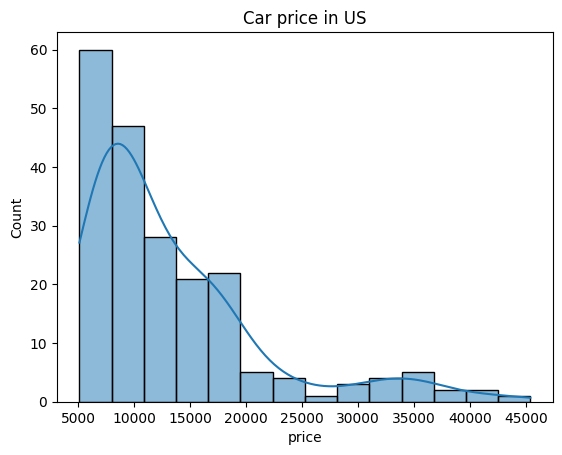

In [19]:
sns.histplot(data=df,x=df['price'],kde=True)
plt.title('Car price in US')
plt.show()

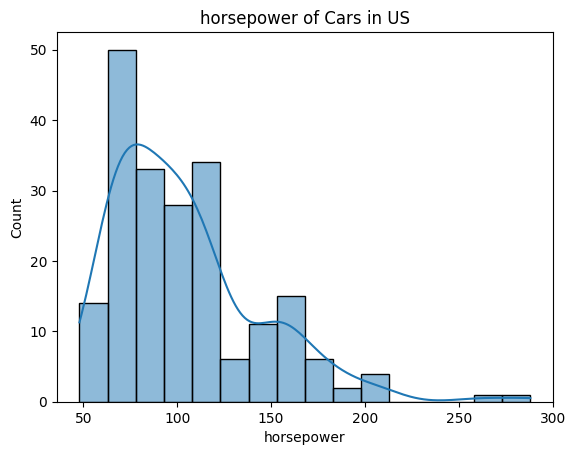

In [20]:
sns.histplot(data=df,x=df['horsepower'],kde=True)
plt.title('horsepower of Cars in US')
plt.show()

In [ ]:
#Feature relationship

In [21]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [22]:
corr_matrix=df.select_dtypes(include=["int32","float64","int64"]).corr()
corr_matrix

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.552208,0.589435,0.491029,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173


<Axes: >

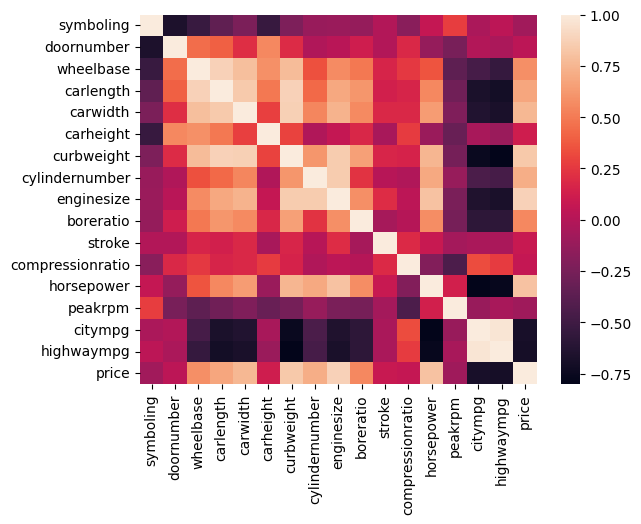

In [23]:
sns.heatmap(corr_matrix)

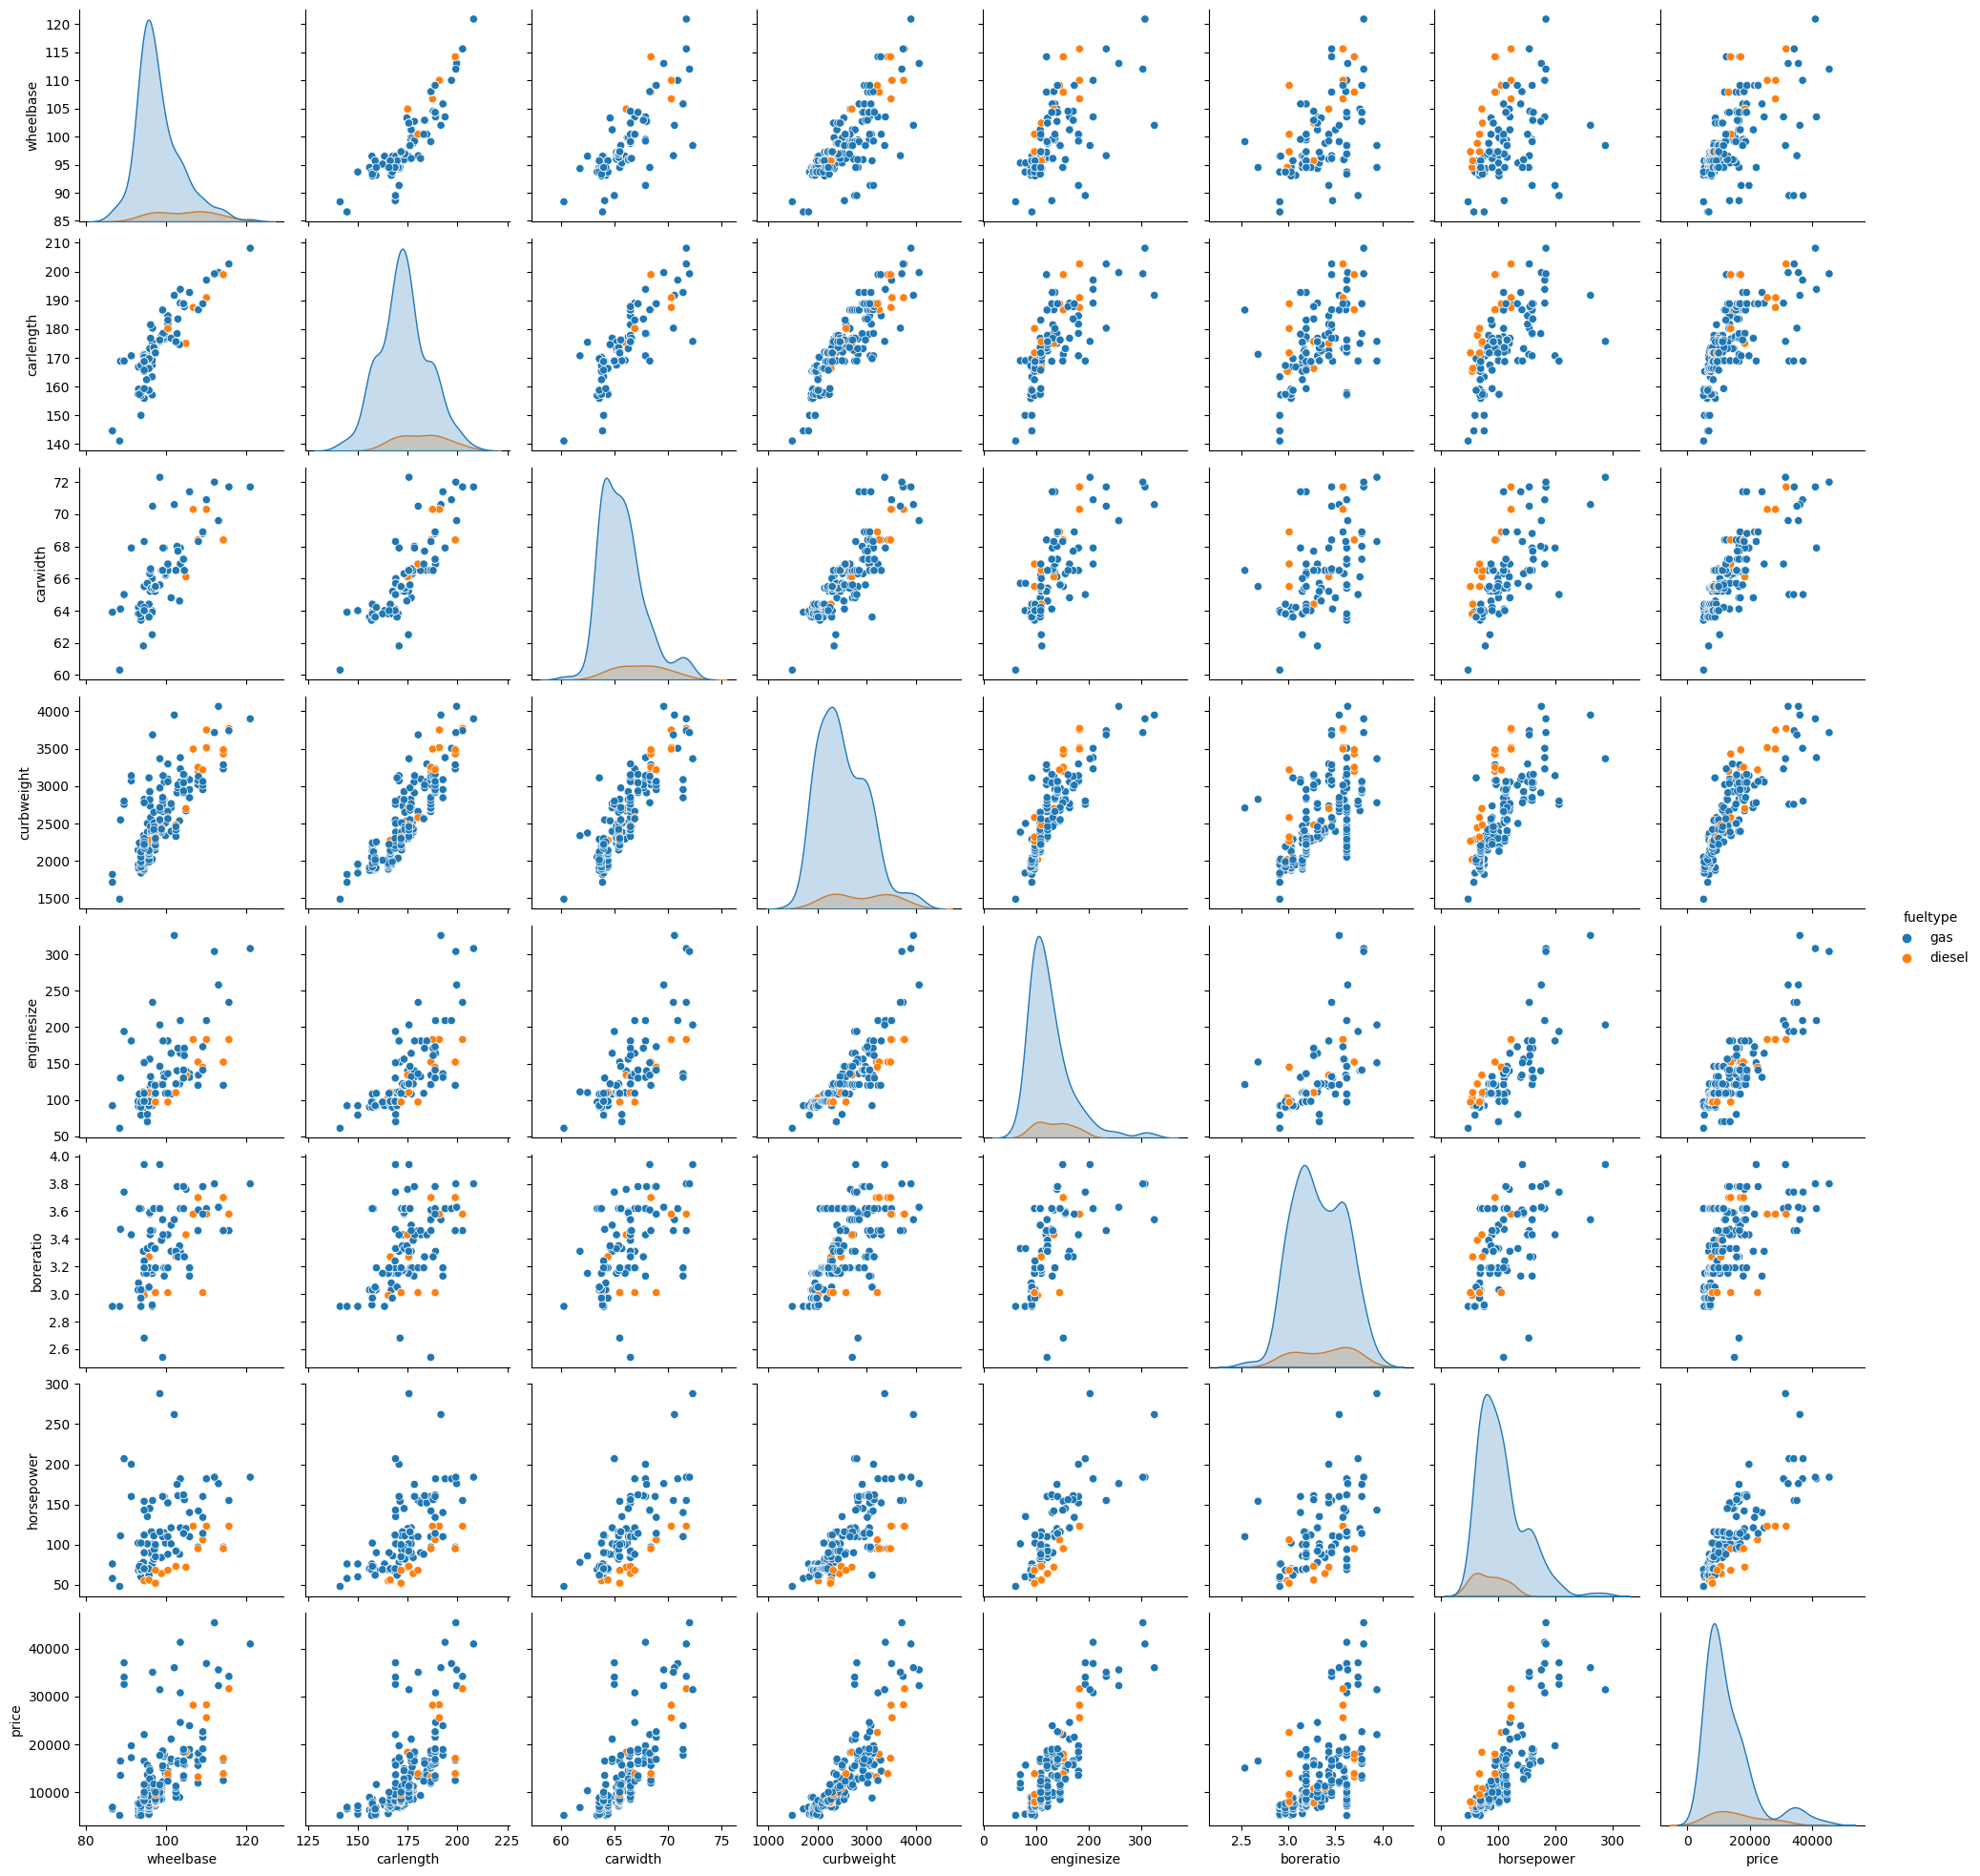

In [24]:
#Scatter plot between the variables
sns.pairplot(df,vars=['wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 
        'horsepower', 'price'],hue='fueltype')
plt.show()


In [ ]:
#Encoding

In [25]:
df.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)
df.replace({'aspiration':{'turbo':0,'std':1}},inplace=True)
df.replace({'carbody':{'convertible':0,'hatchback':1,'sedan':2, 'wagon':3, 'hardtop':4}},inplace=True)
df.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)
df.replace({'enginetype':{'dohc':0,'ohcv':1,'ohc':2,'l':3,'rotor':4,'ohcf':5,'dohcv':6}},inplace=True)
df.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'mfi':2,'1bbl':3,'spfi':4,'4bbl':5,'idi':6,'spdi':7}},inplace=True)

In [26]:
df=df[['symboling',#'CarName','drivewheel',
       'fueltype', 'aspiration', 'doornumber',
       'carbody',  'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']].copy()
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,1,2,0,0,88.6,168.8,64.1,48.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,1,2,0,0,88.6,168.8,64.1,48.8,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,1,0,94.5,171.2,65.5,52.4,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,1,4,2,0,99.8,176.6,66.2,54.3,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,1,4,2,0,99.4,176.6,66.4,54.3,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [27]:
#Feature scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_data = pd.DataFrame(scaler.transform(df), columns=df.columns)

scaled_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-0.328798,0.469295,-1.130388,-2.156678,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,...,0.074449,-0.678384,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,1.743470,-0.328798,0.469295,-1.130388,-2.156678,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,...,0.074449,-0.678384,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0.133509,-0.328798,0.469295,-1.130388,-0.958524,-0.121867,-0.708596,-0.231513,-0.190566,-0.543527,...,0.604046,-0.678384,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.938490,-0.328798,0.469295,0.884652,0.239631,-0.121867,0.173698,0.207256,0.136542,0.235942,...,-0.431076,-0.678384,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.938490,-0.328798,0.469295,0.884652,0.239631,-0.121867,0.107110,0.207256,0.230001,0.235942,...,0.218885,-0.678384,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668


In [28]:
X = df.drop(['price'], axis=1)
Y = df['price']

In [29]:
X

,symboling,fueltype,aspiration,doornumber,carbody,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,1,2,0,0,88.6,168.8,64.1,48.8,...,4,130,0,3.47,2.68,9.0,111,5000,21,27
1,3,0,1,2,0,0,88.6,168.8,64.1,48.8,...,4,130,0,3.47,2.68,9.0,111,5000,21,27
2,1,0,1,2,1,0,94.5,171.2,65.5,52.4,...,6,152,0,2.68,3.47,9.0,154,5000,19,26
3,2,0,1,4,2,0,99.8,176.6,66.2,54.3,...,4,109,0,3.19,3.40,10.0,102,5500,24,30
4,2,0,1,4,2,0,99.4,176.6,66.4,54.3,...,5,136,0,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,1,4,2,0,109.1,188.8,68.9,55.5,...,4,141,0,3.78,3.15,9.5,114,5400,23,28
201,-1,0,0,4,2,0,109.1,188.8,68.8,55.5,...,4,141,0,3.78,3.15,8.7,160,5300,19,25
202,-1,0,1,4,2,0,109.1,188.8,68.9,55.5,...,6,173,0,3.58,2.87,8.8,134,5500,18,23
203,-1,1,0,4,2,0,109.1,188.8,68.9,55.5,...,6,145,6,3.01,3.40,23.0,106,4800,26,27


In [30]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.75,random_state=2)

In [32]:
lin_reg_model=LinearRegression()

In [33]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [34]:
data_prediction=lin_reg_model.predict(X_train)

In [35]:
from sklearn import metrics

error_score = metrics.r2_score(Y_train,data_prediction)
print("R squared Erroe :",error_score)

R squared Erroe : 0.9466183527701363


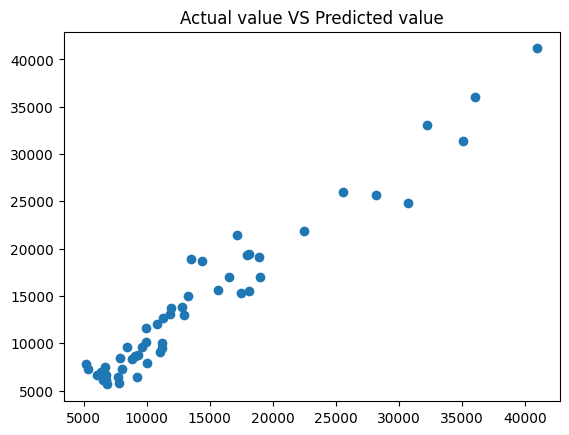

In [46]:
plt.scatter(Y_train,data_prediction)
plt.title("Actual value VS Predicted value")
plt.show()

In [37]:
prediction=lin_reg_model.predict(X_test)
prediction

array([ 5478.17274107, 14174.28192364,  8530.45855494, 10168.68933635,
       12226.35514071,  6531.43377565,  8913.50078014, 10302.57138203,
       10791.47150894,  9407.82161926, 16230.48341828,  6487.98243572,
        9064.92765295, 12167.67368278, 44310.37517047,  4497.7195498 ,
        9096.84203635,  6459.43484233, 20285.02145253,  6140.90591389,
       11682.28293321,  5138.24037026, 19468.46975399, 13117.67482674,
       10006.41077198,  2440.42215933,  6984.52713781,  8393.03813249,
       13709.42861071, 23635.72478511,  8999.07899621,  9087.40842121,
        6140.90591389, 16385.34315597,  5966.3757309 , 20090.96923059,
       24789.47143026, 19909.76528254, 14925.45224778,  9683.29805436,
       23699.25022309, 29926.61391238, 22958.07131076,  8235.46041894,
       12636.34410856,  8105.36049563,  5488.68294246,  5128.77045596,
       10323.81470371, 11877.64862249, 33016.63243027,  9782.64802701,
        7632.17581804,  6767.9445745 , 14288.9553187 , 14420.56081785,
      

In [38]:
X_test.iloc[0]

symboling              1.00
fueltype               0.00
aspiration             1.00
doornumber             4.00
carbody                2.00
enginelocation         0.00
wheelbase             93.70
carlength            157.30
carwidth              63.80
carheight             50.60
curbweight          1989.00
enginetype             2.00
cylindernumber         4.00
enginesize            90.00
fuelsystem             1.00
boreratio              2.97
stroke                 3.23
compressionratio       9.40
horsepower            68.00
peakrpm             5500.00
citympg               31.00
highwaympg            38.00
Name: 25, dtype: float64

In [39]:
Y_test.iloc[0]

6692.0

In [40]:
df.iloc[25]

symboling              1.00
fueltype               0.00
aspiration             1.00
doornumber             4.00
carbody                2.00
enginelocation         0.00
wheelbase             93.70
carlength            157.30
carwidth              63.80
carheight             50.60
curbweight          1989.00
enginetype             2.00
cylindernumber         4.00
enginesize            90.00
fuelsystem             1.00
boreratio              2.97
stroke                 3.23
compressionratio       9.40
horsepower            68.00
peakrpm             5500.00
citympg               31.00
highwaympg            38.00
price               6692.00
Name: 25, dtype: float64

In [41]:
lin_reg_model.coef_

array([-1.82701287e+02,  2.31491964e+04, -1.35937283e+03, -5.58649390e+02,
       -7.29652227e+02, -6.64215349e-11, -2.17649957e+02,  2.09204539e+02,
        6.56485377e+02, -1.87584926e+02,  3.04177520e+00,  6.46261393e+02,
       -5.53458827e+03,  2.72084371e+02, -6.02519786e+02, -2.11591942e+04,
       -9.87503358e+03, -1.24136984e+03,  2.42952274e+01,  1.65212840e+00,
        3.02874956e+02, -2.17810014e+02])

In [42]:
lin_reg_model.intercept_

51275.688767190826

In [43]:
lin_reg_model.score(X_test, Y_test)

0.610928065647141

In [44]:
mse = mean_squared_error(Y_test,prediction)
mse

23277175.17691893

In [45]:
np.sqrt(mse)

4824.642492135446